<a href="https://colab.research.google.com/github/Pogba666/DeepLearning/blob/main/HPE_Lecture_4_with_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
% tensorflow_version 1.x
import tensorflow as tf
import numpy as np
print(tf.__version__)

TensorFlow 1.x selected.
1.15.2


In [2]:
from tensorflow import keras
imdb = keras.datasets.imdb
hp_dict_size = 10000  # HyperParameter choose based on frequency of usage
(xtrain, ytrain), (xtest, ytest) = imdb.load_data(num_words=hp_dict_size)

17465344/17464789 [==============================] - 0s 0us/step


/tensorflow-1.15.2/python3.6/tensorflow_core/python/keras/datasets/imdb.py:129: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/tensorflow-1.15.2/python3.6/tensorflow_core/python/keras/datasets/imdb.py:130: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [3]:
print(ytrain[:10])
# Gives a sentiment
# 1 - Positive
# 0 - Negative

[1 0 0 1 0 0 1 0 1 0]


In [4]:
wordIndex = imdb.get_word_index()
# print(wordIndex[42])
print(wordIndex['hello'])
# Both options done to check if number used as word or word is tokenised as number
# Ranking of words given based on frequency of occurence

1646592/1641221 [==============================] - 0s 0us/step
4822


In [5]:
print(ytrain[1])
print(xtrain[1])    # Gives numbers list as output

0
[1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 4369, 5012, 134, 26, 4, 715, 8, 118, 1634, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207, 110, 3103, 21, 14, 69, 188, 8, 30, 23, 7, 4, 249, 126, 93, 4, 114, 9, 2300, 1523, 5, 647, 4, 116, 9, 35, 8163, 4, 229, 9, 340, 1322, 4, 118, 9, 4, 130, 4901, 19, 4, 1002, 5, 89, 29, 952, 46, 37, 4, 455, 9, 45, 43, 38, 1543, 1905, 398, 4, 1649, 26, 6853, 5, 163, 11, 3215, 2, 4, 1153, 9, 194, 775, 7, 8255, 2, 349, 2637, 148, 605, 2, 8003, 15, 123, 125, 68, 2, 6853, 15, 349, 165, 4362, 98, 5, 4, 228, 9, 43, 2, 1157, 15, 299, 120, 5, 120, 174, 11, 220, 175, 136, 50, 9, 4373, 228, 8255, 5, 2, 656, 245, 2350, 5, 4, 9837, 131, 152, 491, 18, 2, 32, 7464, 1212, 14, 9, 6, 371, 78, 22, 625, 64, 1382, 9, 8, 168, 145, 23, 4, 1690, 15, 16, 4, 1355, 5, 28, 6, 52, 154, 462, 33, 89, 78, 285, 16, 145, 95]


In [6]:
# This dictionary switches words and encoding from wordIndex dictionary so that we can reverse engineer the output of xtrain
dictionary = { encoding:word for word,encoding in wordIndex.items() }
dictionary[42]

"it's"

In [7]:
# dictionary[0]   # word * 0 = 0
#  NLP -> Rules
# <PAD> -> 0 => Similar to padding in CV
# <START> -> 1 => Starting of a sentence
# <UNK> -> Unkown -> anything which we cannot make sense of
# <UNUSED> -> Unused
# These 4 have to be added manually to any dictionary before performing any function on it

word_index = { word:(encoding + 3) for word, encoding in wordIndex.items() }
word_index['<PAD>'] = 0
word_index['<START>'] = 1
word_index['<UNK>'] = 2
word_index['<UNUSED>'] = 3

dictionary = { encoding:word for word,encoding in word_index.items() }

def decoder(review):
    decoder_review = [dictionary.get(word) for word in review]
    sentence = ' '.join(decoder_review)
    return sentence

print(ytrain[2])
decoder(xtrain[2])
# We get gibberish because we have to manipulate the data using NLP Rules

0


"<START> this has to be one of the worst films of the 1990s when my friends i were watching this film being the target audience it was aimed at we just sat watched the first half an hour with our jaws touching the floor at how bad it really was the rest of the time everyone else in the theatre just started talking to each other leaving or generally crying into their popcorn that they actually paid money they had <UNK> working to watch this feeble excuse for a film it must have looked like a great idea on paper but on film it looks like no one in the film has a clue what is going on crap acting crap costumes i can't get across how <UNK> this is to watch save yourself an hour a bit of your life"

In [8]:
lengths = []
for x in range(20):
  lengths.append(len(xtrain[x]))
print(lengths)

[218, 189, 141, 550, 147, 43, 123, 562, 233, 130, 450, 99, 117, 238, 109, 129, 163, 752, 212, 177]


In [9]:
xtrain_padded = keras.preprocessing.sequence.pad_sequences(xtrain, value = 0,
                                                           padding='post',
                                                           truncating='post',
                                                           maxlen=256)

xtest_padded = keras.preprocessing.sequence.pad_sequences(xtest, value = 0,
                                                           padding='post',
                                                           truncating='post',
                                                           maxlen=256)

In [10]:
decoder(xtrain_padded[2])

"<START> this has to be one of the worst films of the 1990s when my friends i were watching this film being the target audience it was aimed at we just sat watched the first half an hour with our jaws touching the floor at how bad it really was the rest of the time everyone else in the theatre just started talking to each other leaving or generally crying into their popcorn that they actually paid money they had <UNK> working to watch this feeble excuse for a film it must have looked like a great idea on paper but on film it looks like no one in the film has a clue what is going on crap acting crap costumes i can't get across how <UNK> this is to watch save yourself an hour a bit of your life <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD

In [11]:
xtrain_padded[2]

array([   1,   14,   47,    8,   30,   31,    7,    4,  249,  108,    7,
          4, 5974,   54,   61,  369,   13,   71,  149,   14,   22,  112,
          4, 2401,  311,   12,   16, 3711,   33,   75,   43, 1829,  296,
          4,   86,  320,   35,  534,   19,  263, 4821, 1301,    4, 1873,
         33,   89,   78,   12,   66,   16,    4,  360,    7,    4,   58,
        316,  334,   11,    4, 1716,   43,  645,  662,    8,  257,   85,
       1200,   42, 1228, 2578,   83,   68, 3912,   15,   36,  165, 1539,
        278,   36,   69,    2,  780,    8,  106,   14, 6905, 1338,   18,
          6,   22,   12,  215,   28,  610,   40,    6,   87,  326,   23,
       2300,   21,   23,   22,   12,  272,   40,   57,   31,   11,    4,
         22,   47,    6, 2307,   51,    9,  170,   23,  595,  116,  595,
       1352,   13,  191,   79,  638,   89,    2,   14,    9,    8,  106,
        607,  624,   35,  534,    6,  227,    7,  129,  113,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [12]:
decoder(xtrain_padded[7])

"<START> the <UNK> tells the story of the four hamilton siblings teenager francis <UNK> <UNK> twins <UNK> joseph <UNK> <UNK> <UNK> <UNK> the <UNK> david samuel who is now the surrogate parent in charge the <UNK> move house a lot <UNK> is unsure why is unhappy with the way things are the fact that his brother's sister kidnap <UNK> murder people in the basement doesn't help relax or calm <UNK> nerves either francis <UNK> something just isn't right when he eventually finds out the truth things will never be the same again br br co written co produced directed by mitchell <UNK> phil <UNK> as the butcher brothers who's only other film director's credit so far is the april <UNK> day 2008 remake enough said this was one of the <UNK> to die <UNK> at the 2006 after dark <UNK> or whatever it's called in keeping with pretty much all the other's i've seen i thought the <UNK> was complete total utter crap i found the character's really poor very unlikable the slow moving story failed to capture my 

In [70]:
hp_dict_size = 10000
hp_embedded_dims = 16
hp_maxlen = 256
hp_batchsize = 128  # constant for all models
hp_epochs = 25
hp_val_size = 10000
hp_dropout = 0.2

# Denser model
hp_d_l3_l4_m1 = 64
hp_d_l4_l5_m1 = 128

# Shallower model
hp_d_l3_l4_m2 = 32
hp_d_l4_l5_m2 = 64

In [71]:
# Model 1
l1_m1 = keras.layers.Embedding(hp_dict_size, hp_embedded_dims)
l2_m1 = keras.layers.GlobalAveragePooling1D()
l3_m1 = keras.layers.Dense(hp_d_l3_l4_m1)
l4_m1 = keras.layers.Dropout(hp_dropout)
l5_m1 = keras.layers.Dense(hp_d_l4_l5_m1, activation=tf.nn.relu)
l6_m1 = keras.layers.Dropout(hp_dropout)
l7_m1 = keras.layers.Dense(1, activation=tf.nn.sigmoid)
layers_m1 = [l1_m1, l2_m1, l3_m1, l4_m1, l5_m1, l6_m1, l7_m1]

# Model 2
l1_m2 = keras.layers.Embedding(hp_dict_size, hp_embedded_dims)
l2_m2 = keras.layers.GlobalAveragePooling1D()
l3_m2 = keras.layers.Dense(hp_d_l3_l4_m2)
l4_m2 = keras.layers.Dense(hp_d_l4_l5_m2, activation=tf.nn.relu)
l5_m2 = keras.layers.Dropout(hp_dropout)
l6_m2 = keras.layers.Dense(1, activation=tf.nn.sigmoid)
layers_m2 = [l1_m2, l2_m2, l3_m2, l4_m2, l5_m2,l6_m2]

In [72]:
m1 = keras.Sequential(layers_m1)
m2 = keras.Sequential(layers_m2)

In [73]:
m1.compile(optimizer='adam', 
           loss='binary_crossentropy',
           metrics=['acc'])

m2.compile(optimizer='adam',
           loss='binary_crossentropy',
           metrics=['acc'])

In [74]:
xval = xtest_padded[:hp_val_size]
yval = ytest[:hp_val_size]
ytest_red = ytest[hp_val_size:]
xtest_red = xtest_padded[hp_val_size:]

In [75]:
import time
start_time = time.time()

history_reg = m1.fit(xtrain_padded, ytrain, epochs = hp_epochs,
                 batch_size=hp_batchsize, 
                 validation_data=(xval,yval))

end_time = time.time()
time_taken = end_time - start_time
print(time_taken)

Train on 25000 samples, validate on 10000 samples
Epoch 1/25
25000/25000 [==============================] - 3s 101us/sample - loss: 0.5319 - acc: 0.7250 - val_loss: 0.3635 - val_acc: 0.8395
Epoch 2/25
25000/25000 [==============================] - 2s 85us/sample - loss: 0.2613 - acc: 0.8969 - val_loss: 0.3136 - val_acc: 0.8677
Epoch 3/25
25000/25000 [==============================] - 2s 85us/sample - loss: 0.1996 - acc: 0.9250 - val_loss: 0.3534 - val_acc: 0.8565
Epoch 4/25
25000/25000 [==============================] - 2s 84us/sample - loss: 0.1616 - acc: 0.9428 - val_loss: 0.3752 - val_acc: 0.8539
Epoch 5/25
25000/25000 [==============================] - 2s 85us/sample - loss: 0.1346 - acc: 0.9571 - val_loss: 0.4115 - val_acc: 0.8513
Epoch 6/25
25000/25000 [==============================] - 2s 85us/sample - loss: 0.1172 - acc: 0.9622 - val_loss: 0.4506 - val_acc: 0.8473
Epoch 7/25
25000/25000 [==============================] - 2s 86us/sample - loss: 0.1046 - acc: 0.9667 - val_loss: 0

In [67]:
import matplotlib.pyplot as plt
stats = history_reg.history
val_acc = stats['val_acc']
acc = stats['acc']
val_loss = stats['val_loss']
loss = stats['loss']
epochs = range(1,hp_epochs+1)

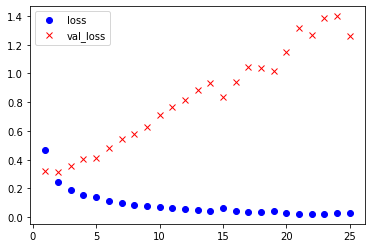

In [68]:
plt.figure()
plt.plot(epochs, loss, 'bo', label='loss')
plt.plot(epochs, val_loss, 'rx', label='val_loss')
plt.legend()
plt.show()

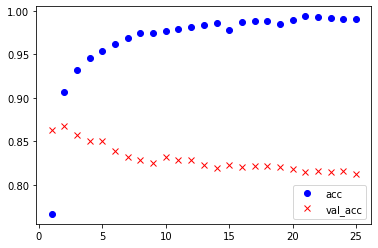

In [69]:
plt.figure()
plt.plot(epochs, acc, 'bo', label='acc')
plt.plot(epochs, val_acc, 'rx', label='val_acc')
plt.legend()
plt.show()

Automation:

1. Grid Search -> Exhaustively created HP combination set where some HP will be included/excluded and  combinations are generated

2. Random Search -> Incomplete problems and infinite answers possible. Workable HP set.

3. Bayesian Search -> Probability based